In [1]:
#Collatz conjecture (https://en.wikipedia.org/wiki/Collatz_conjecture) is a famous outstanding problem in mathematics. 
#The problem is very simple to state : start with any integer n. If n is even take it to n/2 and if n is odd take it 
#to 3n+1. The conjecture states that for any positive integer n, the process will converge to 1 in a finite number
#of times. 

#In this code we will try to analyze different aspects of the conjecture. The questions that we will try to address is
#1. For a given number n how is the trajectory of the process.
#2. If we consider intergers upto N then how are the frequency of numbers that the process goes through. 

In [62]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def collatz(n): #This function returns a list of numbers that the collatz algorithm runs through
    x0=[] #initialising list for the trajectory
    x0.append(n)
    if n<1:
        print("Please enter an input greater than or equal to 1")
    else:
        if n==1:
            x0.append(1)
        while n>1:
            if n%2==0:
                n=int(n/2)
                x0.append(n)
            else:
                n=3*n+1
                x0.append(n)
    return x0


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


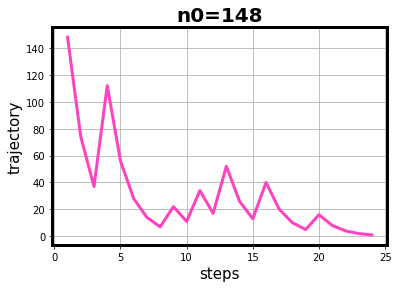

In [64]:
#This shows the collatz trajectory for a number n0
nm=200 #maximum value of starting point
n0=int(nm*np.random.random_sample())+1 #randomly choosing starting point
xs=[]
xs.append(0)
xs=[i1+1 for i1 in range(len(collatz(n0)))]
c2=[1, 1-n0/nm, n0/nm] #new color 2
print(xs)
plt.plot(xs,collatz(n0),color=c2,linewidth=3)
plt.xlabel("steps")
plt.title("n0="+str(n0),fontsize=20, fontweight='bold')
plt.ylabel("trajectory",fontsize=15)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.xlabel("steps",fontsize=15)
plt.grid()

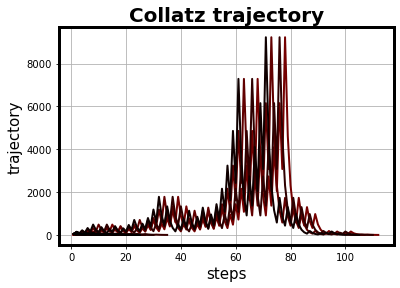

In [91]:
#This shows the collatz trajectory for a number n0
nm=50 #maximum value of starting point
traj=nm #trajectories for numbers from 1 to traj
x0=[]
y=[] #list of collatz trajectories
nstart=[]
nsteps=[] #number of steps
for j in range(traj):
    xs=[]
    n0=j+1 #randomly choosing starting point
    xs.append(0)
    xs=[i1+1 for i1 in range(len(collatz(n0)))]
    c2=[1, 1-n0/nm, n0/nm] #new color 2
    y.append(collatz(n0))
    x0.append(xs)
    nstart.append(n0)
    nsteps.append(len(collatz(n0)))
    

#print(x0)
#print(y)

k=2
for k in range(len(y)):
    c2=[1-nstart[k]/traj, 0, 0] #random colors
    plt.plot(x0[k],y[k],color=c2,linewidth=2)
    
plt.xlabel("steps")
plt.title("Collatz trajectory",fontsize=20, fontweight='bold')
plt.ylabel("trajectory",fontsize=15)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.xlabel("steps",fontsize=15)
plt.grid()

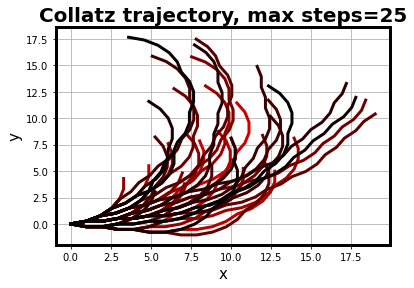

In [104]:
#This expresses the trajectory as : Starting from n0 which corresponds to point (0,0) if the number in the next step is
#even then we move the add (cos(d\theta),sin(d\theta)) else we move the point to (cos(-d\theta),sin(-dtheta)) 
#iterate the process till the number hits 1
dtheta=15*np.pi/180
xt=[]
yt=[]
xtree=[] #for tree trajectory
ytree=[] #for tree trajectory
NP=25 #maximum steps for trajectory plot
for j in range(len(y)):
    xt.append([])
    yt.append([])
    xtree.append([])
    ytree.append([])
    theta=0
    for i in range(len(y[j])):
        if i==0:
            theta=0
            xt[j].append(0)
            yt[j].append(0)
            xtree[j].append(0)
            ytree[j].append(0)
        elif i>0:
            if y[j][i]%2==0:
                theta=theta+dtheta
                xt[j].append(xt[j][i-1]+np.cos(theta))
                yt[j].append(yt[j][i-1]+np.sin(theta))
                xtree[j].append(xtree[j][i-1]+np.sign(np.random.rand()-0.5)/(np.sqrt(2)))
                ytree[j].append(ytree[j][i-1]+1/(np.sqrt(2)))
            else:
                theta=theta-dtheta
                xt[j].append(xt[j][i-1]+np.cos(theta))
                yt[j].append(yt[j][i-1]+np.sin(theta))
                xtree[j].append(xtree[j][i-1])
                ytree[j].append(ytree[j][i-1]+1)
for k in range(len(y)):
    nt=min(NP-1,len(xt[k])-1)
    c2=[1-nstart[k]/traj, 0, 0] #random colors
    plt.plot(xt[k][0:nt],yt[k][0:nt],color=c2,linewidth=3)

plt.xlabel("x",fontsize=15)
plt.title("Collatz trajectory, max steps="+str(NP),fontsize=20, fontweight='bold')
plt.ylabel("y",fontsize=15)
plt.colorbar
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
#plt.xlabel("steps",fontsize=15)
plt.grid()
            

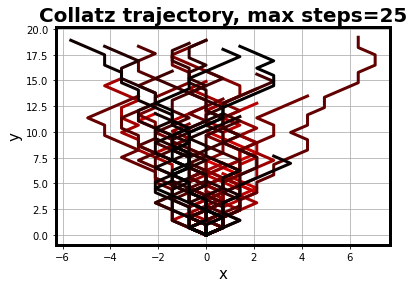

In [105]:
for k in range(len(y)):
    nt=min(NP-1,len(xt[k])-1)
    c2=[1-nstart[k]/traj, 0, 0] #random colors
    plt.plot(xtree[k][0:nt],ytree[k][0:nt],color=c2,linewidth=3)

plt.xlabel("x",fontsize=15)
plt.title("Collatz trajectory, max steps="+str(NP),fontsize=20, fontweight='bold')
plt.ylabel("y",fontsize=15)
plt.colorbar
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
#plt.xlabel("steps",fontsize=15)
plt.grid()

In [ ]:
N=200 #numbers upto which process will be repeated
x=[] #integer on which collatz is applied
nx=[] #number of steps to reach 1
nxl=[] #steps needed to reach below the starting point it is 1 for even numbers
hn=[] #for histogram of the frequency of numbers that comes up in the process.
for i in range(N):
    j=i+1
    kt=0
    x.append(j)
    k=0
    if j==1:
        nx.append(1)
        nxl.append(1)
        hn.append(1)
    while j>1:
        k+=1
        if j%2==0:
            j=int(j/2)
            hn.append(j)
            if j<i+1 and kt==0:
                nxl.append(k)
                kt=1
        elif j%2==1:
            j=3*j+1
            hn.append(j)
        #print(i,j,k)
        if j==1:
            nx.append(k)

        
    

In [ ]:
np.log10(len(hn))

In [ ]:
#histogram of the frequency of numbers
plt.hist(hn,100,facecolor='cyan',edgecolor='k',linewidth=1)
#plt.yscale('log')
plt.xlabel("n",fontsize=15)
plt.ylabel("frequency",fontsize=15)
#plt.ylim([10,10000])
yticks = [10**i for i in range(int(np.log10(len(hn))+1))]
ytick_labels = [10**i/len(hn) for i in range(int(np.log10(len(hn))+1))]
plt.title("N="+str(N),fontsize=20)
plt.show()

In [98]:
np.sign(-0.2)

-1.0

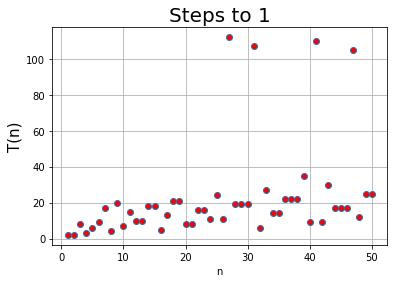

In [94]:
#This plot shows how many steps are taken by n to reach 1
plt.plot(nstart, nsteps,'o', markersize=6, markerfacecolor='red')
plt.xlabel("n", fontsize=10)
plt.ylabel("T(n)", fontsize=15)
plt.title("Steps to 1", fontsize=20)
plt.grid()
plt.show()

In [ ]:
#This plot shows how many steps are taken by n0(starting point) to reach a number below n0
plt.plot(x, nxl,'o', markersize=6, markerfacecolor='m')
plt.xlabel("n", fontsize=10)
plt.ylabel("T0(n)", fontsize=15)
plt.title("Steps to below starting point", fontsize=20)
plt.grid()
#plt.xscale('log')
plt.show()